In [1]:
import numpy as np
import xarray as xr
import pickle as pk
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as lr 
from sklearn.metrics import r2_score as r2_score
from scipy.optimize import curve_fit as curve_fit
import statsmodels.api as sm
import matplotlib as mpl
mpl.rc('font',size=16,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
def int_alpha(ands,ors):
    fit = lr().fit(ors,ands)
    return fit.intercept_, -fit.coef_
def pred(ands,ors):
    fit = lr().fit(ors,ands)
    ecs = fit.intercept_/-fit.coef_
    predict = fit.predict(ors)
    score = r2_score(ands,predict)
    return predict

def scoreme(ands,ors):
    fit = lr().fit(ors,ands)
    predict = fit.predict(ors)
    score = r2_score(ands,predict)
    return score

In [20]:
#read in step response data
path = '/Volumes/eSSD0/Papers/JoC_gFBK/Data/'
case = ['ctl.2']

years = np.arange(140)
    
pi = pk.load(open(path+'SI/b.e12.pi-control.T31_g37.ctl.2_ctl_diag.pk','rb'))
geo = pk.load(open(path+'Outputs/b.e12.1pyCO2.T31_g37.ctl.closed.2_ctl_diag.pk','rb'))

eb = {}
eb['geo'] = pk.load(open(path+'Outputs/EB/b.e12.1pyCO2.T31_g37.ctl.closed.2_EB_gam.pk','rb'))
eb['co2'] = pk.load(open(path+'Outputs/EB/b.e12.1pyCO2.T31_g37.ctl.open.2_EB_gam.pk','rb'))
for i in eb.keys():
    eb[i]['net'] = eb[i]['salb']+eb[i]['Planck']+eb[i]['lapse']+eb[i]['q_tropo']+eb[i]['cld_lw']+eb[i]['cld_sw']+eb[i]['ta_strato']
    eb[i].pop('cld_sw_lo')
    eb[i].pop('cld_sw_hi')
    eb[i].pop('cld_lw_lo')
    eb[i].pop('cld_lw_hi')

var = list(eb['co2'].keys())

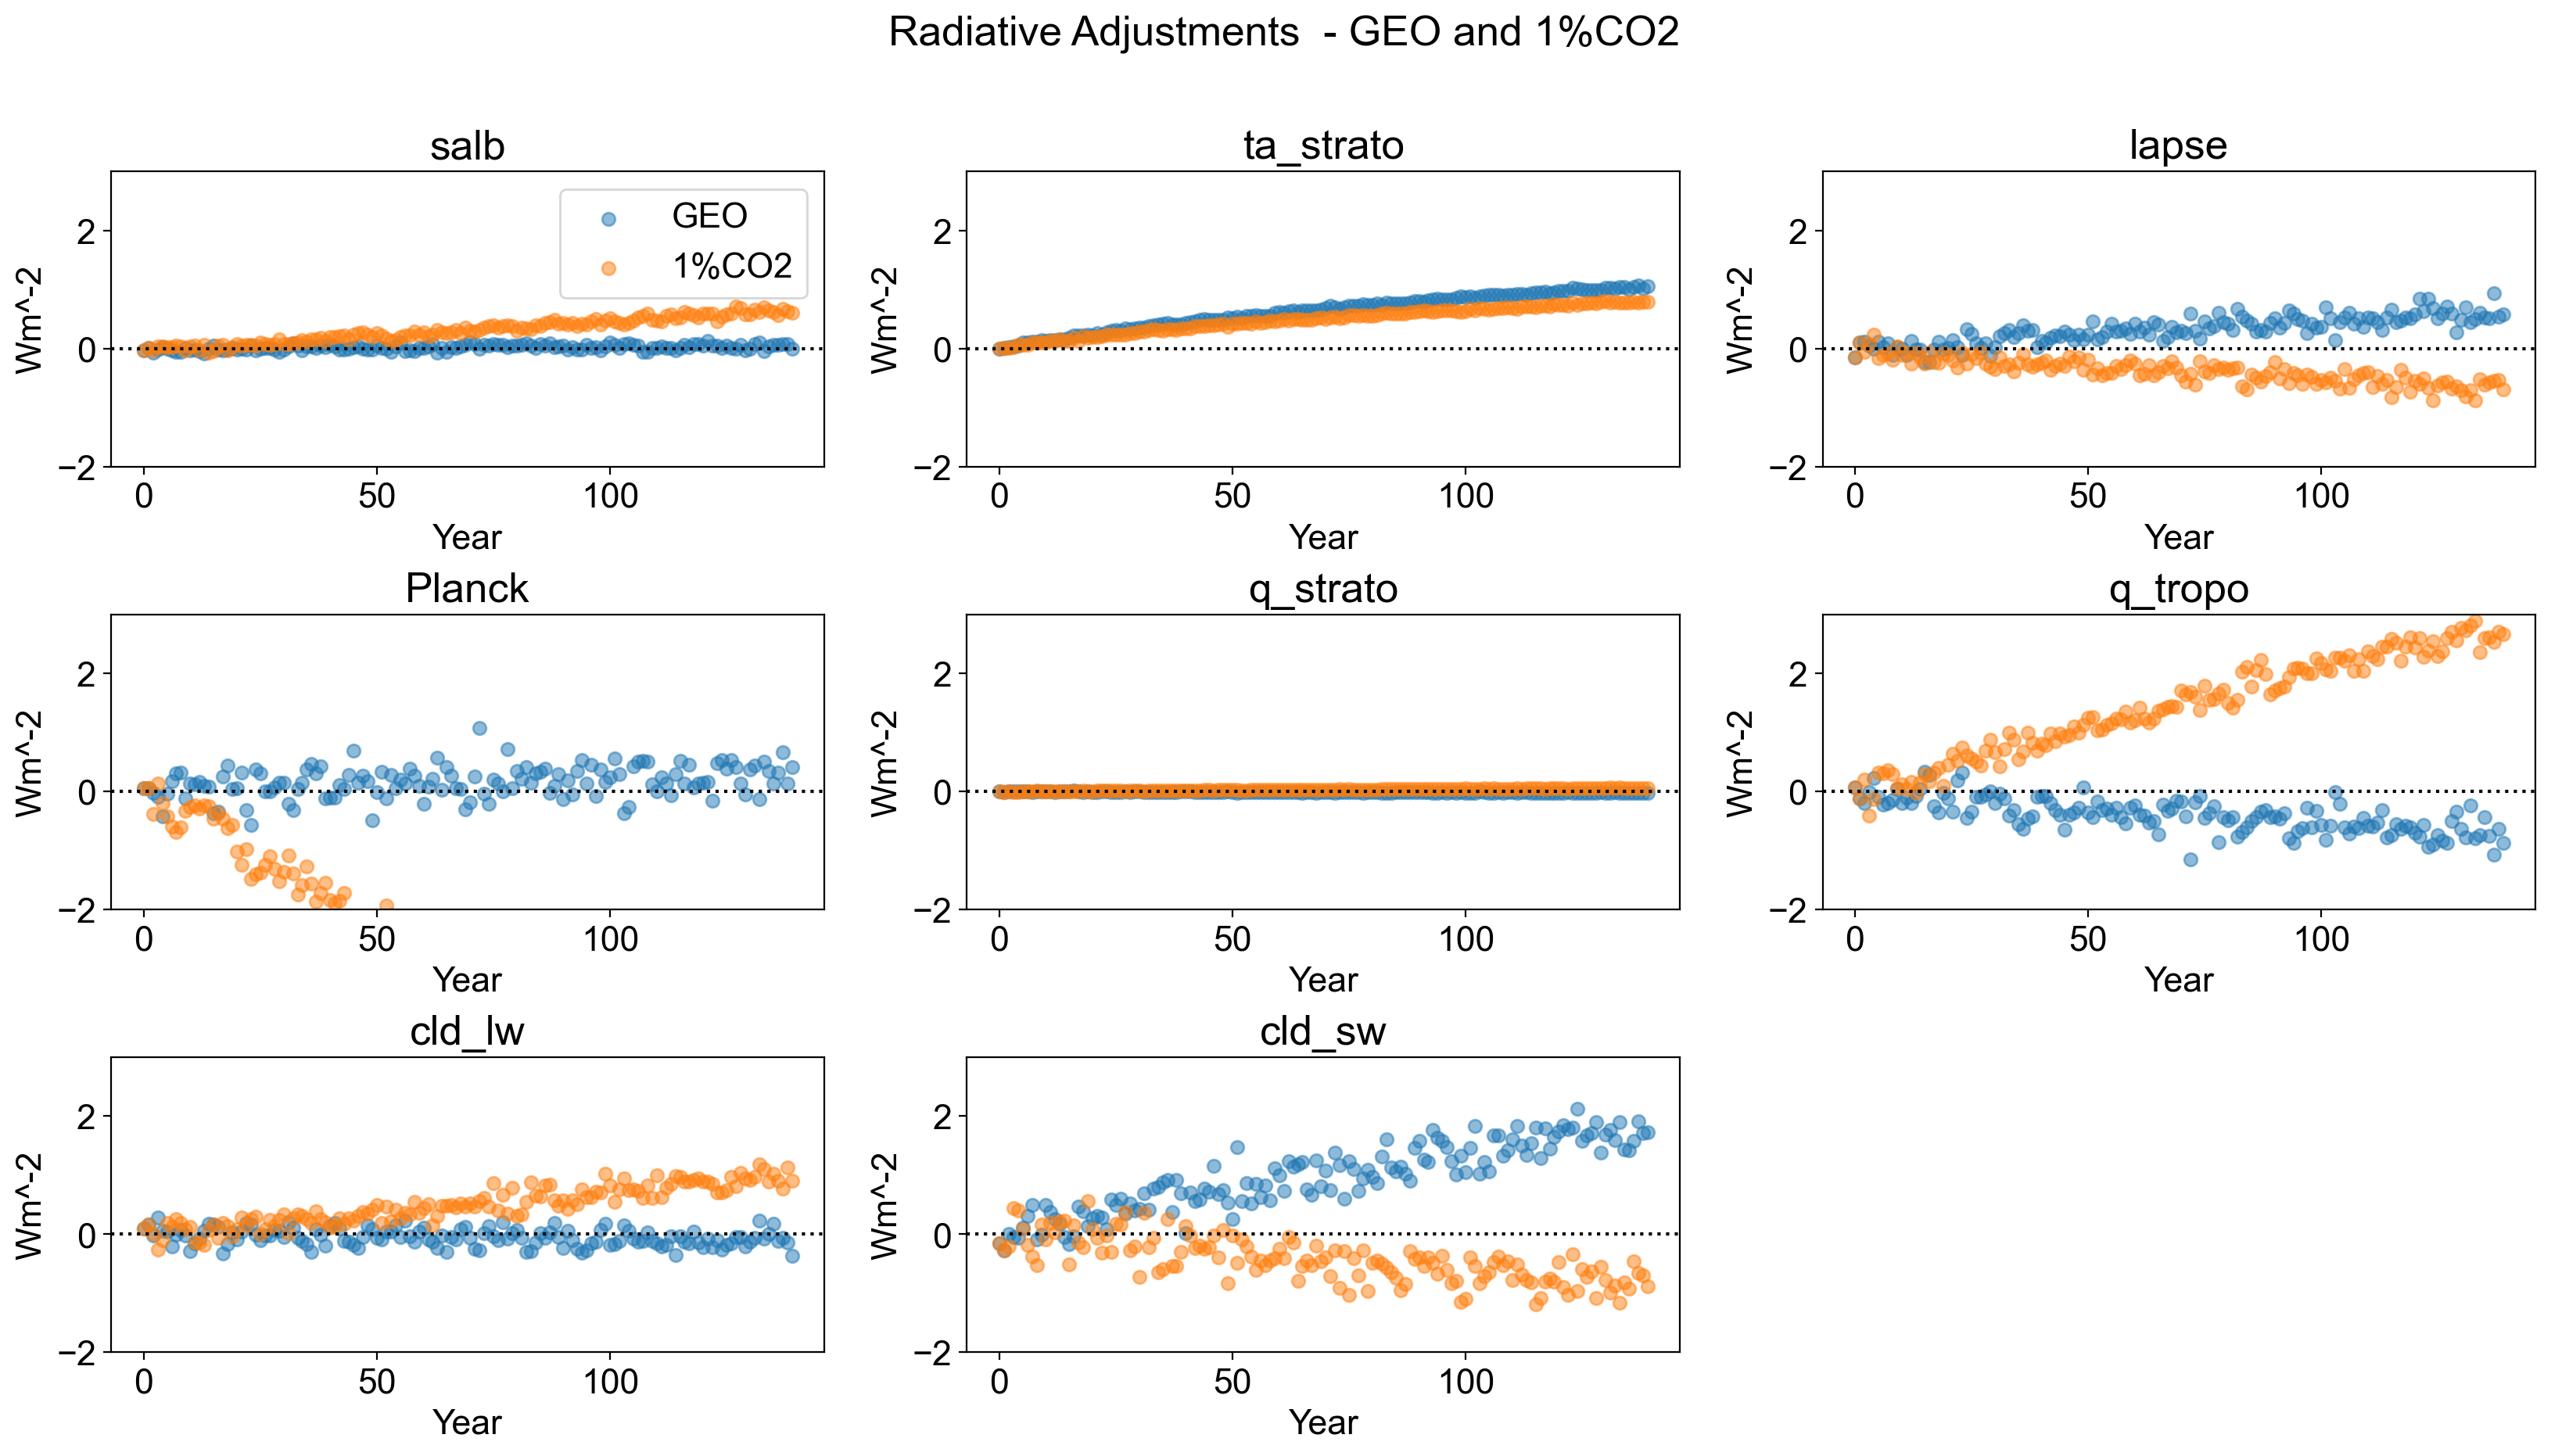

In [35]:
fig, ax = plt.subplots(figsize=(20,10),dpi=200)
plt.suptitle('Radiative Adjustments  - GEO and 1%CO2')
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(var[i])
    plt.scatter(years,eb['geo'][var[i]][:140], alpha=0.5, label = 'GEO')
    plt.scatter(years,eb['co2'][var[i]][:140], alpha=0.5, label = '1%CO2')
    plt.ylim(-2,3)
    plt.ylabel('Wm^-2')
    plt.xlabel('Year')
    plt.axhline(0, color='k',linestyle=':')

    if i == 0:
        plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.savefig('Adjustments.png',bbox_inches='tight')